<a href="https://colab.research.google.com/github/Mrwick129/LinearRegressionProjectCGPA/blob/main/LinearRegressionProjectCGPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [398]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [399]:
import seaborn as sns

# Importing data in form of csv

In [400]:
df1 = pd.read_csv("/content/cgpa22.csv")

In [401]:
df1.shape

(571, 43)

In [402]:
df1.head(6)

,Se10t No.,PH-121,HS-101,4Y-105,HS-105/12,MT-111,4S-105,4S-106,EL-102,EE-119,...,4S-312,4S-317,4S-403,4S-421,4S-406,4S-414,4S-419,4S-423,4S-412,CGPA
0,1,6,2,3,4,3,2,1,3,6,...,3.0,3.0,3.0,3.0,9.0,10.0,3.0,7.0,9.0,2.205
1,2,10,1,2,1,6,4,1,10,2,...,2.0,1.0,4.0,1.0,9.0,6.0,4.0,4.0,7.0,2.008
2,3,10,7,10,6,8,10,6,8,9,...,7.0,7.0,10.0,4.0,10.0,10.0,10.0,9.0,10.0,3.608
3,4,1,5,2,1,1,9,2,3,1,...,2.0,4.0,2.0,3.0,6.0,7.0,5.0,5.0,5.0,1.906
4,5,9,9,9,8,10,10,9,8,10,...,6.0,8.0,8.0,6.0,9.0,10.0,9.0,9.0,10.0,3.448
5,6,10,6,7,2,5,9,5,7,8,...,4.0,6.0,5.0,5.0,9.0,9.0,8.0,6.0,7.0,3.026


# Plotting null values to get an idea about NaN values

<Axes: >

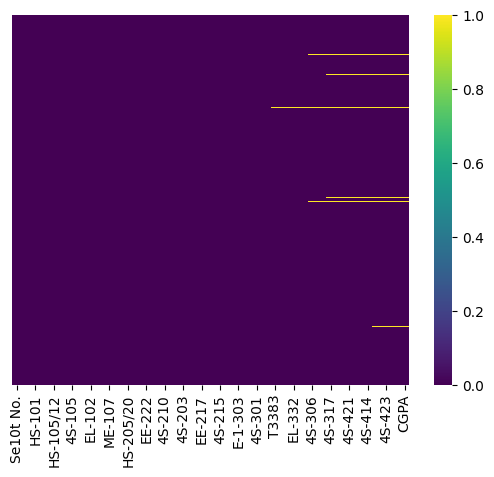

In [434]:

sns.heatmap(df1.isnull(), yticklabels=False, cbar=True, cmap='viridis')

# Using imputer to fill the NaN values

In [404]:
imputer = SimpleImputer(strategy='mean')

In [405]:
df = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

<Axes: xlabel='CGPA', ylabel='count'>

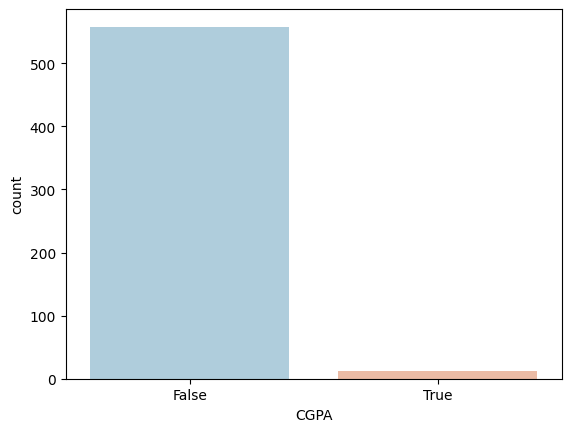

In [406]:
sns.countplot(x=df1['CGPA'].isnull(), palette='RdBu_r')

# # Separate the target variable from the feature variables 

In [407]:
y=df['CGPA']

In [408]:
x=df.drop('CGPA',axis=1)

In [409]:
print(x.shape)

(571, 42)


In [410]:
print(y.shape)

(571,)


# Spliting the data

In [411]:
from sklearn.model_selection import train_test_split

In [412]:
xtr,xts,ytr,yts= train_test_split(x,y,test_size=0.3,random_state=51)

In [413]:
print(xtr)

     Se10t No.  PH-121  HS-101  4Y-105  HS-105/12  MT-111  4S-105  4S-106  \
114      115.0     5.0     3.0     2.0        4.0     3.0     7.0     2.0   
316      317.0     5.0     4.0     7.0        5.0     7.0     8.0     8.0   
249      250.0     9.0     9.0     9.0        6.0     6.0     8.0     7.0   
458      459.0     4.0     1.0     9.0        8.0     9.0     7.0     7.0   
462      463.0    10.0     4.0    10.0       10.0     7.0    10.0     8.0   
..         ...     ...     ...     ...        ...     ...     ...     ...   
361      362.0     2.0     6.0     6.0        8.0     9.0    10.0     7.0   
436      437.0    10.0     7.0    10.0        8.0    10.0    10.0     5.0   
528      529.0    10.0     8.0    10.0       10.0     9.0    10.0    10.0   
485      486.0     7.0     7.0     9.0        8.0     9.0     9.0    10.0   
57        58.0     2.0     3.0     3.0        1.0     1.0     6.0     5.0   

     EL-102  EE-119  ...  4S-306  4S-312  4S-317  4S-403  4S-421  4S-406  \

# Preprocessing of the data

In [414]:
from sklearn.preprocessing import StandardScaler

In [415]:
sc=StandardScaler()

In [416]:
sc.fit(xtr)

StandardScaler()

In [417]:
xtr=sc.transform(xtr)
xts=sc.transform(xts)

# Fitting and training the data


In [418]:
from sklearn.linear_model import LinearRegression

In [419]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [420]:
lr=LinearRegression()

In [421]:
lr.fit(xtr,ytr)

LinearRegression()

In [422]:
lr.coef_


array([-0.04469605,  0.01011756,  0.02160119,  0.0236973 ,  0.05947875,
        0.02586704,  0.00027541, -0.02389072,  0.04747935,  0.01791739,
        0.0514718 ,  0.02434435, -0.02715404,  0.01255361, -0.03217547,
        0.00414287, -0.01314281,  0.01572008,  0.00872101,  0.03162725,
       -0.02353351,  0.00868889,  0.03704125, -0.02009249, -0.02908877,
        0.00801278, -0.01444686,  0.01164437,  0.01603116,  0.04050368,
        0.05083456,  0.01255289,  0.02981786,  0.07641903,  0.09267285,
        0.02703904,  0.04946469,  0.03026668, -0.02879726,  0.06386324,
        0.06757215,  0.04271744])

In [423]:
lr.intercept_

2.981369633761824

# Plotting predicted data and testing data


In [424]:
import matplotlib.pyplot as plt

In [425]:
p=lr.predict(xts)

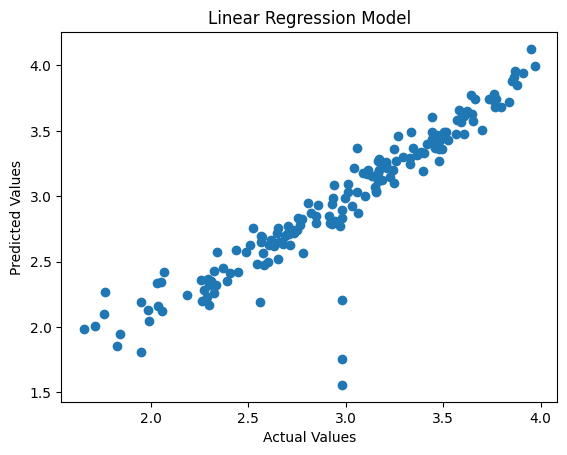

In [426]:
plt.scatter(yts,p)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

# Training and Testing accuracy

In [427]:
print("Training accuracy :",lr.score(xtr,ytr))

Training accuracy : 0.923624865416762


In [428]:
print("Testing accuracy :",lr.score(xts,yts))

Testing accuracy : 0.8751989628885114


# Checking the predicted value on my own


In [429]:
id=3
ch=df.loc[id]
ch.shape

(43,)

In [430]:
ch=ch.drop('CGPA')

In [431]:
ch=ch.to_numpy().reshape(1,42)

In [432]:
ans= lr.predict(ch)[0]
print(id)
print (df.loc[id]['CGPA'])
print(ans/2)

3
1.906
2.649767881792899


In [433]:
df.head()

,Se10t No.,PH-121,HS-101,4Y-105,HS-105/12,MT-111,4S-105,4S-106,EL-102,EE-119,...,4S-312,4S-317,4S-403,4S-421,4S-406,4S-414,4S-419,4S-423,4S-412,CGPA
0,1.0,6.0,2.0,3.0,4.0,3.0,2.0,1.0,3.0,6.0,...,3.0,3.0,3.0,3.0,9.0,10.0,3.0,7.0,9.0,2.205
1,2.0,10.0,1.0,2.0,1.0,6.0,4.0,1.0,10.0,2.0,...,2.0,1.0,4.0,1.0,9.0,6.0,4.0,4.0,7.0,2.008
2,3.0,10.0,7.0,10.0,6.0,8.0,10.0,6.0,8.0,9.0,...,7.0,7.0,10.0,4.0,10.0,10.0,10.0,9.0,10.0,3.608
3,4.0,1.0,5.0,2.0,1.0,1.0,9.0,2.0,3.0,1.0,...,2.0,4.0,2.0,3.0,6.0,7.0,5.0,5.0,5.0,1.906
4,5.0,9.0,9.0,9.0,8.0,10.0,10.0,9.0,8.0,10.0,...,6.0,8.0,8.0,6.0,9.0,10.0,9.0,9.0,10.0,3.448


# ✅Done:: THANK YOU